# Processing Xenium Batch Punches with SpatialData and Napari

This notebook describes the process of selecting Xenium batch punches per batch size using the `sdataspatiol` program and `napari`, and saving the data for further processing.

**Xenium left 1 to 28**
- [ ] output-XETG00202__0040844_Left__SCAF04316_Left_R1__20241121__163918

**Xenium right 29 to 49**
- [ ] output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918

In [1]:
import numpy as np
import pandas as pd
import spatialdata as sd
import spatialdata_io
from geopandas import GeoDataFrame
from shapely import Polygon
from spatialdata.models import ShapesModel
from spatialdata.transformations import Identity
from napari_spatialdata import Interactive
from spatialdata import polygon_query

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


### Step 1: Reading and Writing Data as Zarr Files
The first step involves reading the input data and saving it as a Zarr file formatted as a `SpatialData` object.


In [3]:
path_read = '/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutput/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918'
path_zarr = path_read + '.zarr'

In [4]:
sdata = spatialdata_io.xenium(
    path=str(path_read),
    n_jobs=8,
    cells_boundaries=True,
    nucleus_boundaries=True,
    morphology_focus=True,
    cells_as_circles=True,
)
print("done")

INFO     reading                                                                                                   
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutpu
         t/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918/cell_feature_ma
         trix.h5                                                                                                   
done


/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/tifffile/tifffile.py:8884: UserWarning: <tifffile.TiffPage 0 @16> reading array from closed file
  warnings.warn(


In [5]:
sdata.write(path_zarr)

INFO     The Zarr backing store has been changed from None the new file path:                                      
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutpu
         t/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918.zarr           


In [7]:
sdata = sd.read_zarr(path_zarr)

/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/gpfs/gsfs10/users/kanferg/conda/envs/spatialdata_env/lib/python3.12/site-packag

### Step 2: Running Napari and Defining Shapes for Xenium Punches
Using `napari`, shapes for each Xenium punch are defined. Follow these instructions to interact with the layers:
<div class="alert alert-block alert-success">
<b>Note:</b> Press <code>Shift + E</code> to save the layer.
</div>

In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

import matplotlib.pyplot as plt
import spatialdata_plot

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7174778931180315].


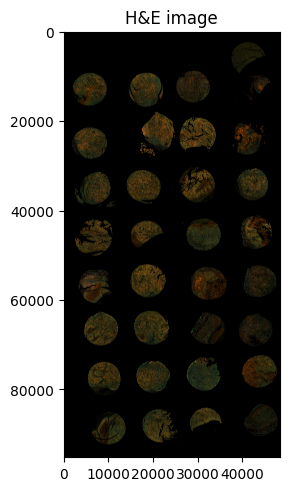

In [9]:
sdata.pl.render_images("morphology_focus").pl.show(title="H&E image")

In [10]:
interactive = Interactive(sdata)
interactive.run()

2024-12-01 12:18:26.147 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:18:26.151 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:18:53.466 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:18:53.472 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:19:00.243 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:19:00.248 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:19:00.250 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:19:00.903 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:19:00.907 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:19:14.058 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:20:50.304 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:20:50.312 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:12.987 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:12.994 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:13.408 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:13.413 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:31.841 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:31.847 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:34.864 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:21:34.870 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-12-01 12:27:33.079 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:27:33.084 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:28:39.834 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:28:39.843 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:28:43.820 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:28:43.825 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:28:44.281 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:28:44.286 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:29:27.074 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:29:27.081 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-12-01 12:35:45.048 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:35:45.053 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:36:23.520 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:36:23.527 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:37:05.134 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:37:05.141 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:37:09.334 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:37:09.340 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:37:09.802 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:37:09.807 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

2024-12-01 12:43:43.501 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:43:43.508 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:43:46.856 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:43:46.863 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:43:47.249 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:43:47.254 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:44:21.216 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:44:21.223 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:44:24.761 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:44:24.767 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:45:50.613 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:45:50.619 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:30.447 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:30.454 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:34.235 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:34.241 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:34.708 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:34.714 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:58.952 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:46:58.959 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

INFO: Layer saved


2024-12-01 12:48:22.466 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:22.474 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:24.329 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:28.672 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:28.678 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:29.666 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:32.566 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:32.573 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:34.460 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:38.071 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:38.078 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:39.025 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:41.770 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:41.777 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:42.663 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:45.119 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:45.126 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:46.026 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:48.587 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:48.594 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:49.535 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:52.007 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:52.014 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:52.951 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:55.355 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:55.362 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:56.335 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:48:59.444 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:48:59.451 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:00.391 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:03.741 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:03.748 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:04.710 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:08.003 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:08.010 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:09.033 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:12.390 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:12.396 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:13.469 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:16.880 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:16.886 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:17.928 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:21.536 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:21.543 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:22.541 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:26.148 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:26.155 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:27.200 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:30.640 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:30.647 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:31.629 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:35.186 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:35.193 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:36.244 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:40.973 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer saved


2024-12-01 12:49:43.656 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:43.662 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:44.685 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:47.289 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:47.296 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:48.235 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:50.990 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:50.997 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:51.982 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:55.322 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:55.329 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:56.299 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:49:59.626 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:49:59.633 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:00.648 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:03.442 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:03.449 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:04.409 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:07.547 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:07.553 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:08.640 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:12.277 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:12.284 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:13.345 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:16.954 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer saved


2024-12-01 12:50:19.451 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:19.457 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:20.397 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:23.197 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:23.203 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:24.255 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:27.586 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:27.592 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:28.680 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer saved


2024-12-01 12:50:32.265 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:32.272 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:33.382 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:36.809 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:36.815 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:37.897 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


2024-12-01 12:50:41.342 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:41.348 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-01 12:50:42.275 | WARNING  | napari_spatialdata._viewer:_write_element_to_disk:170 - Annotations only added in memory, please manually save to disk.


INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


(-0.5, 1439.5, 875.5, -0.5)

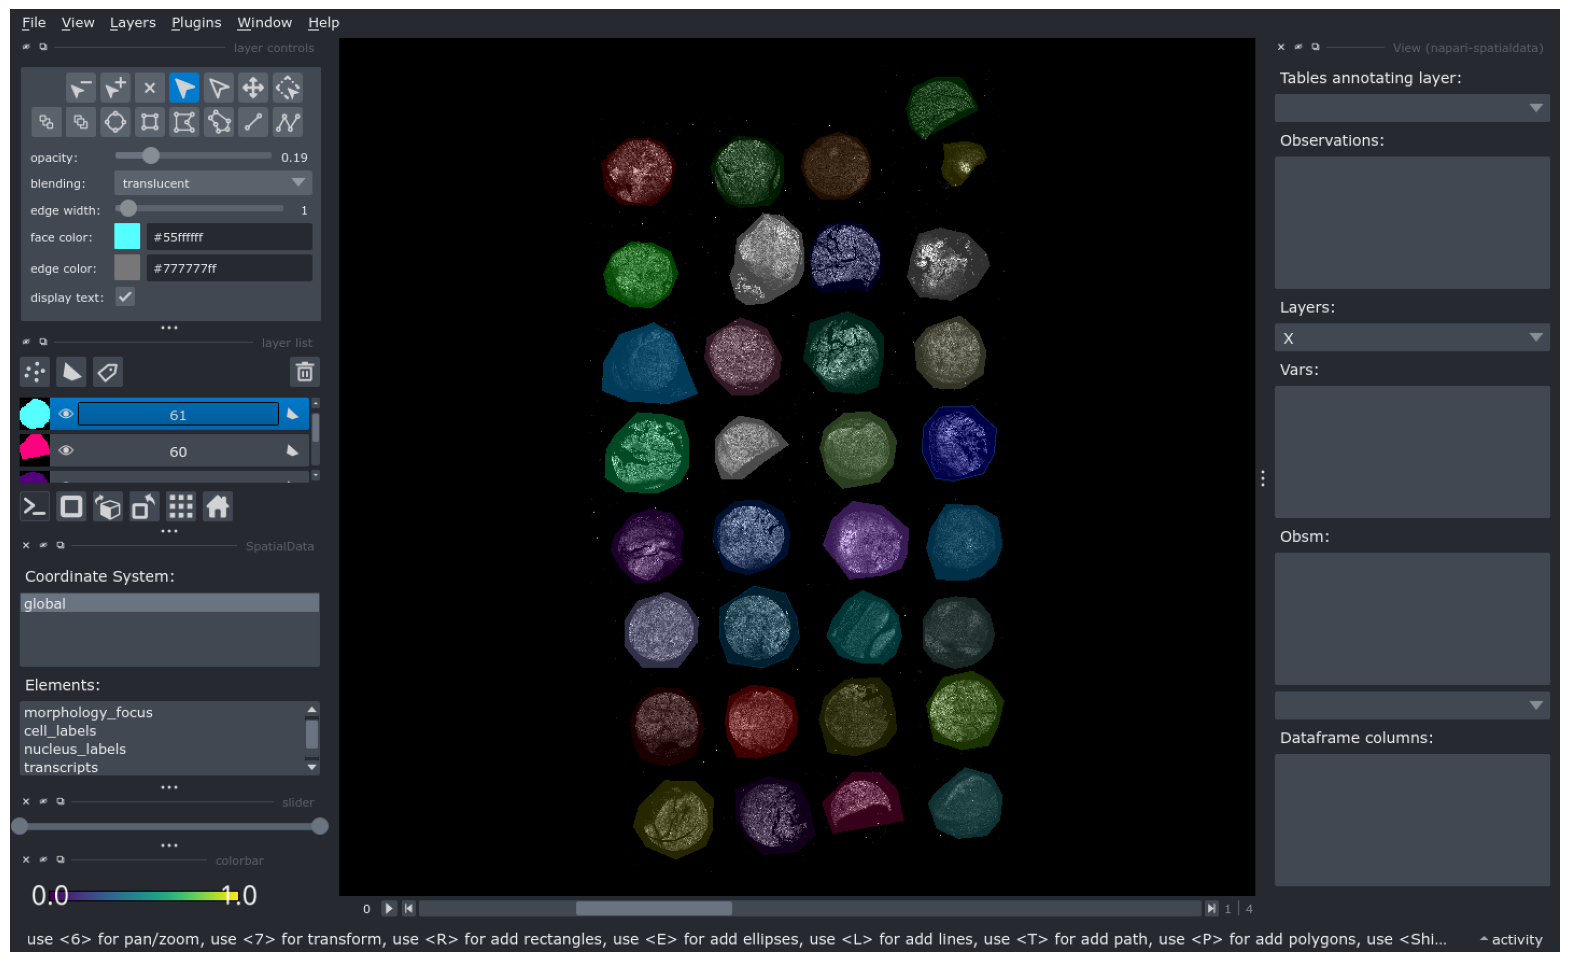

In [17]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.imshow(interactive.screenshot())
plt.axis("off")

In [12]:
sdata

SpatialData object, with associated Zarr store: /gpfs/gsfs10/users/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutput/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918.zarr
├── Images
│     └── 'morphology_focus': DataTree[cyx] (5, 95169, 48375), (5, 47584, 24187), (5, 23792, 12093), (5, 11896, 6046), (5, 5948, 3023)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (95169, 48375), (47584, 24187), (23792, 12093), (11896, 6046), (5948, 3023)
│     └── 'nucleus_labels': DataTree[yx] (95169, 48375), (47584, 24187), (23792, 12093), (11896, 6046), (5948, 3023)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 13) (3D points)
├── Shapes
│     ├── '29': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '30': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '31': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '32': GeoDataFrame shape: (1, 1) (2D shapes)
│     ├── '33': GeoDataFrame sha

In [14]:
path_zarr_label = path_read + 'label' +'.zarr'
sdata.write(path_zarr_label,overwrite=True)

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside                                                                                         
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutpu
         t/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918label.zarr).    
         Please see the documentation of `is_self_contained()` to understand the implications of working with      
         SpatialData objects that are not self-contained.                                                          
INFO     The Zarr backing store has been changed from                                                              
         /data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutpu
         t/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317

In [15]:
print(f'{path_zarr_label}')

/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutput/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918label.zarr


### Step 3: Saving the AnnData Objects
After defining the shapes, the AnnData objects of the polygons are saved by running the bash file:

```bash
write_batch_from_napari.sh

In [ ]:
filtered_tables = {}
polygon = sdata.shapes['29'].geometry.iloc[0]
filtered_tables['29'] = polygon_query(sdata, polygon=polygon,target_coordinate_system = 'global')["table"]

<div class="alert alert-block alert-danger">
  <b>Note:</b> One sample was missed. Add a polygon using Napari and save the AnnData.
</div>


In [3]:
path_read = '/data/kanferg/Sptial_Omics/projects/NguyenLab/data/CS037196_Trautmann_Xenium/SCAF4317/PrimaryAnalysisOutput/SCAF4317_PA_xenium/output-XETG00202__0040847_Right__SCAF04317_Right_R1__20241121__163918'
path_zarr_label = path_read + 'label' +'.zarr'
sdata = sd.read_zarr(path_zarr_label)

In [4]:
interactive = Interactive(sdata)
interactive.run()

2024-12-02 09:16:12.604 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:12.605 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:45.685 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:45.693 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:53.099 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:53.104 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:53.105 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:53.660 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:16:53.664 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updating layer.
2024-12-02 09:17:02.774 | INFO     | napari_spatialdata._view:_on_layer_update:357 - Updati

INFO: Layer(s) inherited info from morphology_focus
INFO: Layer saved


In [6]:
pathout = '/data/kanferg/Sptial_Omics/projects/NguyenLab/spatialomicstoolkit/data_out'

In [5]:
polygon = sdata.shapes[str(0)].geometry.iloc[0]
andata = polygon_query(sdata, polygon=polygon,target_coordinate_system = 'global')["table"]

In [8]:
andata_save = andata.copy()
andata_save.obs['batch'] = str(0)

In [10]:
import os
andata_save.write_h5ad(os.path.join(pathout, "andata_save_batch_"+str(0)+".h5ad"))